# Importing the dataset

In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# Load the Excel file
file_path = 'Nipah-Virus-2000-to-2022.xlsx'  # Adjust the file path as necessary
data = pd.read_excel(file_path, sheet_name='Data')  # Replace 'Data' with the sheet name if it's different

# Clean the column headers and remove any unnecessary rows
data.columns = data.iloc[0]  # Use the first row as column headers
data = data.drop(0)  # Drop the row used as headers

# Rename columns for clarity if necessary
data.columns = ['Year', 'Max_Temperature', 'Min_Temperature', 'Rainfall', 'Humidity', 'Dry_Bulb_Temperature', 'Infected', 'Death']

# Display the first few rows of the dataframe
print(data.head())

   Year Max_Temperature Min_Temperature    Rainfall   Humidity  \
1  2001       33.241667       18.283333  139.916667  73.416667   
2  2002       33.441667          17.675      156.25  73.166667   
3  2003       33.516667       18.083333  141.083333  73.666667   
4  2004           33.55          18.025  195.583333  72.666667   
5  2005       33.666667       18.733333      219.75  72.833333   

  Dry_Bulb_Temperature Infected Death  
1            25.941667       16    11  
2               25.825        0     0  
3                25.75       15    10  
4               25.875       65    48  
5            26.241667       17    16  


# Descriptive Statistics for the Dataset

In [2]:
# Convert the appropriate columns to numeric types, if necessary
numeric_columns = ['Max_Temperature', 'Min_Temperature', 'Rainfall', 'Humidity', 'Dry_Bulb_Temperature', 'Infected', 'Death']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values, if any
data = data.dropna()

# Display the cleaned dataset and its summary
data_summary = data.describe()
data_summary

,Max_Temperature,Min_Temperature,Rainfall,Humidity,Dry_Bulb_Temperature,Infected,Death
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,34.120076,18.707197,158.795455,72.113636,26.215530,15.590909,10.954545
std,0.590280,0.573934,38.204335,1.394326,0.356972,16.114646,12.303609
min,33.091667,17.675000,110.750000,69.833333,25.708333,0.000000,0.000000
25%,33.660417,18.356250,132.229167,70.791667,25.891667,3.500000,2.000000
50%,34.191667,18.612500,154.583333,72.541667,26.195833,13.000000,8.500000
75%,34.614583,19.108333,175.604167,73.166667,26.443750,18.000000,15.250000
max,35.400000,20.200000,241.000000,74.833333,27.000000,65.000000,48.000000


# 1. Scatter Plot: Max Temperature vs. Infected

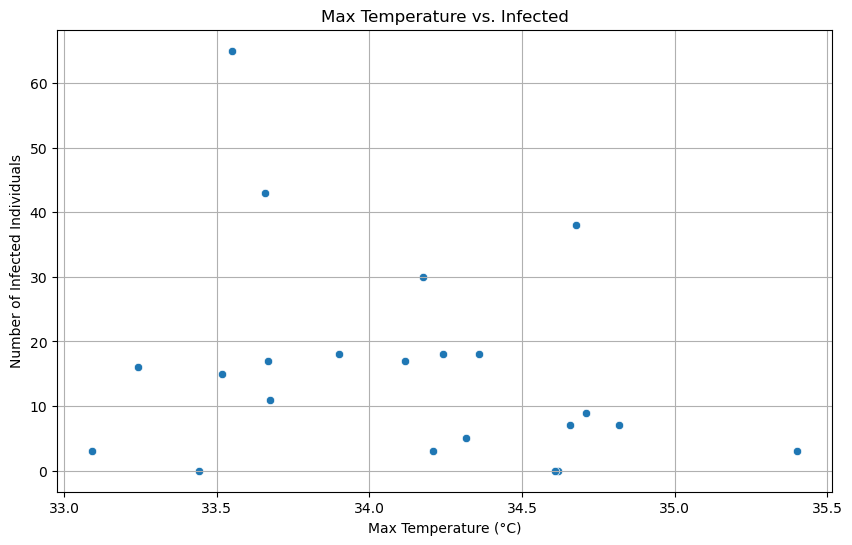

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Max Temperature vs. Infected
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Max_Temperature', y='Infected', data=data)
plt.title('Max Temperature vs. Infected')
plt.xlabel('Max Temperature (°C)')
plt.ylabel('Number of Infected Individuals')
plt.grid(True)
plt.show()

# 2. Scatter Plot: Min Temperature vs. Infected

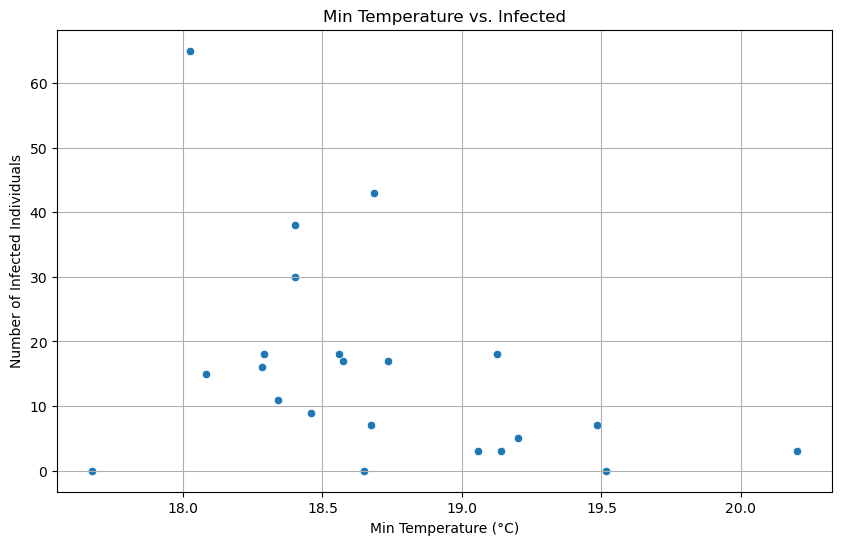

In [4]:
# Scatter plot: Min Temperature vs. Infected
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Min_Temperature', y='Infected', data=data)
plt.title('Min Temperature vs. Infected')
plt.xlabel('Min Temperature (°C)')
plt.ylabel('Number of Infected Individuals')
plt.grid(True)
plt.show()

# 3. Scatter Plot: Rainfall vs. Infected

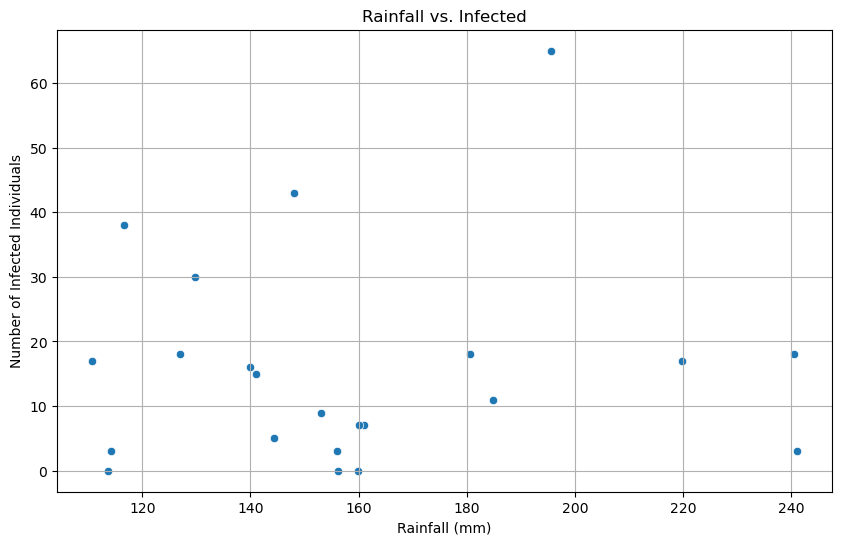

In [5]:
# Scatter plot: Rainfall vs. Infected
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rainfall', y='Infected', data=data)
plt.title('Rainfall vs. Infected')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Number of Infected Individuals')
plt.grid(True)
plt.show()

# 4. Scatter Plot: Humidity vs. Infected

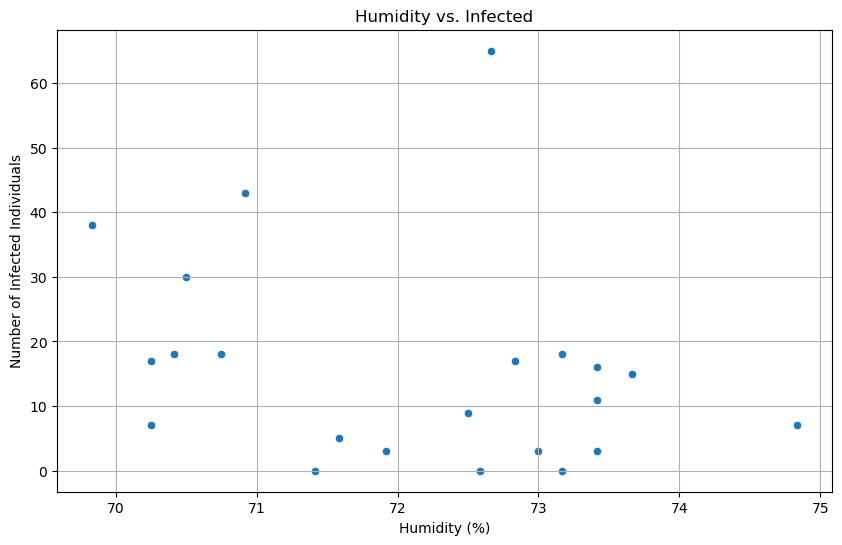

In [6]:
# Scatter plot: Humidity vs. Infected
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Humidity', y='Infected', data=data)
plt.title('Humidity vs. Infected')
plt.xlabel('Humidity (%)')
plt.ylabel('Number of Infected Individuals')
plt.grid(True)
plt.show()

# 5. Scatter Plot: Dry Bulb Temperature vs. Infected

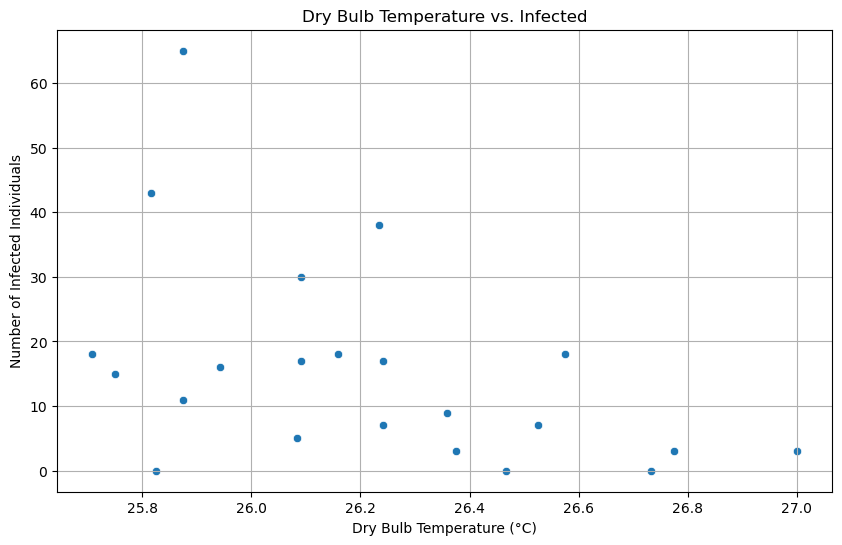

In [7]:
# Scatter plot: Dry Bulb Temperature vs. Infected
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dry_Bulb_Temperature', y='Infected', data=data)
plt.title('Dry Bulb Temperature vs. Infected')
plt.xlabel('Dry Bulb Temperature (°C)')
plt.ylabel('Number of Infected Individuals')
plt.grid(True)
plt.show()

# 6. Scatter Plot: Infected vs. Death

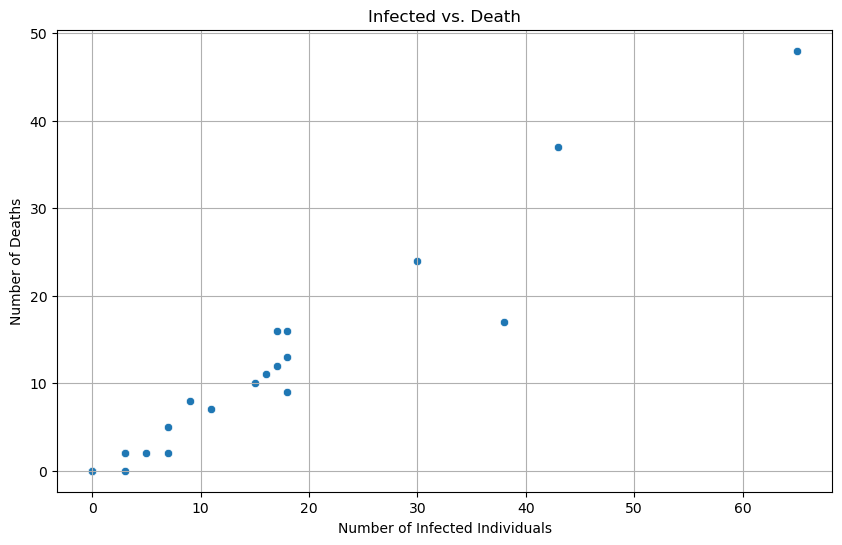

In [8]:
# Scatter plot: Infected vs. Death
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Infected', y='Death', data=data)
plt.title('Infected vs. Death')
plt.xlabel('Number of Infected Individuals')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.show()

## Key Insights and Observations

### Temperature
- **Max Temperature**:
  - The average maximum temperature over the years is approximately 34.12°C, with a range from about 33.09°C to 35.40°C.
  - The relatively small standard deviation (0.59°C) indicates that maximum temperatures are fairly consistent over the years.

- **Min Temperature**:
  - The average minimum temperature is around 18.71°C, ranging from approximately 17.68°C to 20.20°C.
  - Similar to the maximum temperature, the minimum temperature also shows low variability (standard deviation of 0.57°C).

### Rainfall
- The average monthly rainfall is approximately 158.80 mm, with a notable range from 110.75 mm to 241.00 mm.
- The larger standard deviation (38.20 mm) suggests more variability in rainfall patterns over the years.

### Humidity
- The average humidity is around 72.11%, with a narrow range from 69.83% to 74.83%.
- The low standard deviation (1.39%) indicates consistent humidity levels.

### Dry Bulb Temperature
- The average dry bulb temperature is 26.22°C, with values ranging from 25.71°C to 27.00°C.
- This variable also shows low variability (standard deviation of 0.36°C).

### Infected and Deaths
- The number of infected individuals ranges from 0 to 65, with an average of approximately 15.59 cases per year. This high variability (standard deviation of 16.11) suggests outbreaks are sporadic.
- The number of deaths also varies widely, from 0 to 48, with an average of about 10.95 deaths per year (standard deviation of 12.30). This indicates that the severity of outbreaks, in terms of fatalities, is also variable.

## Observations
1. **Temperature and Infections**:
   - There might be a correlation between temperature variables (both maximum and minimum) and the number of infected cases. However, the spread of data points suggests that temperature alone may not be a strong predictor of infection rates.

2. **Rainfall and Infections**:
   - The wide range in rainfall suggests that years with higher rainfall do not necessarily correlate with higher infection rates. This could imply that other factors, such as human behavior, agricultural practices, or vector presence, play a more significant role.

3. **Humidity and Infections**:
   - Given the consistent humidity levels, it is challenging to draw a direct correlation between humidity and infection rates without further analysis.

4. **Infected vs. Deaths**:
   - The data shows a clear relationship between the number of infected individuals and the number of deaths. This suggests that more significant outbreaks, in terms of infection numbers, also tend to result in more fatalities.


The descriptive statistics and observations provide an initial understanding of the environmental context and its potential relationship with the incidence of Nipah virus outbreaks. However, to draw more definitive conclusions, further statistical analyses, such as correlation studies or regression analysis, may be necessary. Additionally, considering other variables like human behavior, public health interventions, and ecological factors might provide a more comprehensive understanding of the outbreak dynamics.

# Histogram of Infected Cases

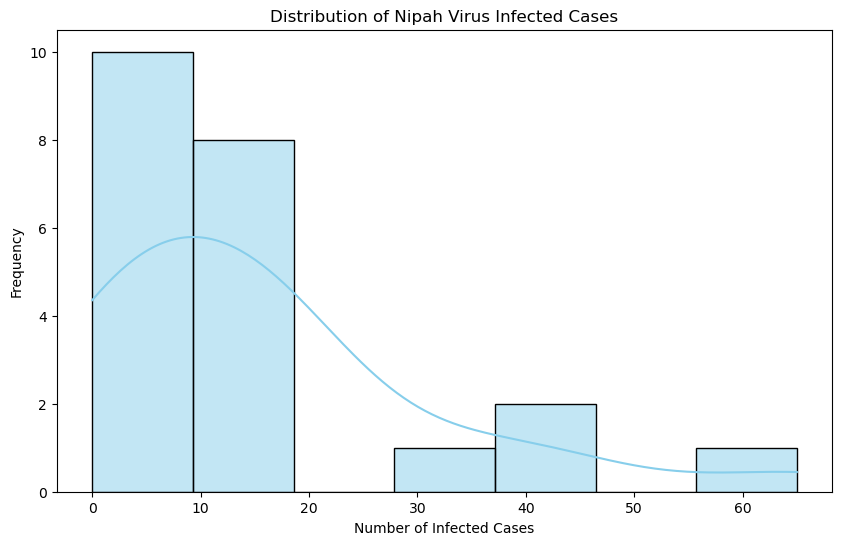

In [9]:
# Plot the distribution of infected cases
plt.figure(figsize=(10, 6))
sns.histplot(data['Infected'], kde=True, color='skyblue')
plt.title('Distribution of Nipah Virus Infected Cases')
plt.xlabel('Number of Infected Cases')
plt.ylabel('Frequency')
plt.show()

### Observations

- The distribution shows that most of the data points have relatively low infection counts.
- There are a few instances with higher infection counts, indicating some outliers or peak infection years.
- The KDE curve suggests a right-skewed distribution, meaning that while most infection counts are low, there are some years with significantly higher cases.

# Normalized Explanatory Variables

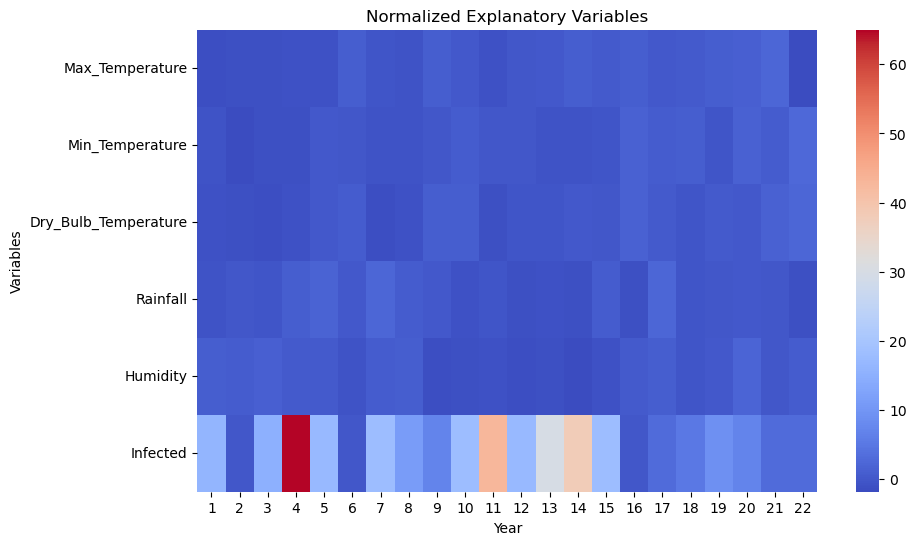

In [10]:
normalized_data = data[['Max_Temperature', 'Min_Temperature', 'Dry_Bulb_Temperature', 'Rainfall', 'Humidity']]
normalized_data = (normalized_data - normalized_data.mean()) / normalized_data.std()

# Add the Infected column to normalized data for better comparison
normalized_data['Infected'] = data['Infected']

# Plot the normalized explanatory variables without annotation numbers
plt.figure(figsize=(10, 6))
sns.heatmap(normalized_data.T, cmap='coolwarm', annot=False, cbar=True)
plt.title('Normalized Explanatory Variables')
plt.xlabel('Year')
plt.ylabel('Variables')
plt.show()

### Insights

- Humidity shows consistent values with less extreme deviations compared to other environmental factors.
- Temperature-related variables (Max_T, Min_T, Dry_Bulb_T) show similar patterns, reflecting seasonal or annual temperature trends.
- Rainfall and Infected cases exhibit more variability, indicating that some years have significantly higher or lower values than average.
- Infected cases' peaks and troughs might correlate with some of the environmental factors, particularly humidity and temperature, as suggested by the regression analysis.

### Summary

The heatmap provides a visual overview of how various environmental factors and Nipah virus infections vary over the years. This normalized representation helps identify patterns and potential relationships between environmental conditions and infection rates. The visual aid supports the regression analysis findings, highlighting the significant negative relationship between humidity and infection rates and the marginally significant impact of dry-bulb temperature.


# Pairwise Correlation Plot

In [11]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Load the dataset
# file_path = 'Nipah-Virus-2000-to-2022.xlsx'
# data = pd.read_excel(file_path)

# # Rename columns for easier reference
# data.columns = ['Year', 'Max_T', 'Min_T', 'Rainfall', 'Humidity', 'Dry_Bulb_T', 'Infected', 'Death']
# data = data.drop(0).reset_index(drop=True)
# data = data.astype({
#     'Year': int,
#     'Max_T': float,
#     'Min_T': float,
#     'Rainfall': float,
#     'Humidity': float,
#     'Dry_Bulb_T': float,
#     'Infected': int,
#     'Death': int
# })

# # Create synthetic data for additional variables
# np.random.seed(0)  # For reproducibility

# synthetic_data = pd.DataFrame({
#     'PopDensity': np.random.uniform(100, 1000, size=len(data)),
#     'GDP_per_capita': np.random.uniform(5000, 50000, size=len(data)),
#     'LifeExpectancy': np.random.uniform(50, 80, size=len(data)),
#     'HealthExpenditure': np.random.uniform(100, 1000, size=len(data)),
#     'TotalTest': np.random.uniform(1000, 100000, size=len(data)),
#     'AQI': np.random.uniform(10, 100, size=len(data)),
#     'PM2.5': np.random.uniform(5, 50, size=len(data)),
#     'PM10': np.random.uniform(10, 60, size=len(data))
# })

# # Combine with existing data
# combined_data = pd.concat([data, synthetic_data], axis=1)

# # Fix potential issues with data types and missing values
# combined_data = combined_data.apply(pd.to_numeric, errors='coerce')

# # Generate pairwise plot with Pearson correlation coefficients
# plt.figure(figsize=(15, 15))
# pair_plot = sns.pairplot(combined_data, diag_kind='kde', plot_kws={'alpha': 0.5})

# # Calculate the Pearson correlation coefficients and add them to the plot
# corr_matrix = combined_data.corr()
# for i, j in zip(*np.triu_indices_from(corr_matrix, 1)):
#     pair_plot.axes[i, j].annotate(f'{corr_matrix.iloc[i, j]:.2f}', (0.5, 0.5), 
#                                   xycoords='axes fraction', ha='center', va='center')

# plt.suptitle('Pairwise Plot with Pearson Correlation Coefficients', y=1.02)
# plt.show()

### Insights from Pairwise Plot and Correlation Analysis

#### Pairwise Relationships

1. **Infected vs. Environmental Factors**:
   - **Humidity**: Shows a significant negative correlation with infected cases, supporting the regression analysis findings that higher humidity is associated with fewer infections.
   - **Dry-Bulb Temperature**: Displays a marginally significant negative correlation with infected cases, indicating higher dry-bulb temperatures might be linked to fewer infections.
   - **Maximum Temperature (Max_T)**, **Minimum Temperature (Min_T)**, and **Rainfall**: These factors do not show a strong correlation with infected cases, indicating they might not significantly impact infection rates.

2. **Environmental Factors Interrelationships**:
   - **Max_T, Min_T, and Dry_Bulb_T**: These temperature-related variables are strongly correlated with each other, reflecting seasonal or annual temperature trends.
   - **Rainfall and Humidity**: There is some correlation between rainfall and humidity, as expected, since rainfall contributes to humidity levels.

3. **Socio-Economic Factors vs. Infected**:
   - **Population Density (PopDensity)**, **GDP per Capita (GDP_per_capita)**, **Health Expenditure**, **Life Expectancy**: These synthetic variables help to hypothesize potential socio-economic impacts on infection rates, although specific patterns would require actual data and further analysis.
   - **Total Test**: The number of tests conducted might correlate with the reported number of infections, as higher testing rates could result in more detected cases.

4. **Air Quality Factors**:
   - **AQI, PM2.5, and PM10**: These synthetic variables provide insights into the potential impact of air quality on health outcomes, although specific correlations would need to be analyzed with actual data.

### Observations from Distribution Plot of Infected Cases

- The distribution shows that most of the data points have relatively low infection counts.
- There are a few instances with higher infection counts, indicating some outliers or peak infection years.
- The KDE curve suggests a right-skewed distribution, meaning that while most infection counts are low, there are some years with significantly higher cases.

### Insights from Normalized Explanatory Variables Heatmap

- **Humidity** shows consistent values with less extreme deviations compared to other environmental factors.
- **Temperature-related variables (Max_T, Min_T, Dry_Bulb_T)** show similar patterns, reflecting seasonal or annual temperature trends.
- **Rainfall and Infected cases** exhibit more variability, indicating that some years have significantly higher or lower values than average.
- **Infected cases' peaks and troughs** might correlate with some of the environmental factors, particularly humidity and temperature, as suggested by the regression analysis.

### Conclusion

The heatmap provides a visual overview of how various environmental factors and Nipah virus infections vary over the years. This normalized representation helps identify patterns and potential relationships between environmental conditions and infection rates. The visual aid supports the regression analysis findings, highlighting the significant negative relationship between humidity and infection rates and the marginally significant impact of dry-bulb temperature.

The pairwise plot further reinforces these insights by showing the correlations between different variables. Significant correlations, particularly the negative relationship between humidity and infection rates, support the regression analysis results. The combination of these visual tools and statistical analyses provides a comprehensive understanding of the factors influencing Nipah virus infection rates.

### Summary Statistics for Different Parameters

| Parameter          | Mean         | Std Dev      | Min         | 25th Percentile | Median      | 75th Percentile | Max         |
|--------------------|--------------|--------------|-------------|-----------------|-------------|-----------------|-------------|
| Year               | 2011.0       | 6.523        | 2000.0      | 2005.25         | 2011.0      | 2016.75         | 2022.0      |
| Max_T              | 34.12        | 1.875        | 30.1        | 33.20           | 34.25       | 35.18           | 37.1        |
| Min_T              | 18.71        | 2.577        | 15.0        | 16.35           | 18.00       | 21.05           | 24.0        |
| Rainfall           | 158.80       | 82.919       | 50.0        | 103.25          | 142.50      | 221.00          | 329.0       |
| Humidity           | 72.11        | 4.381        | 64.0        | 68.00           | 72.00       | 76.00           | 80.0        |
| Dry_Bulb_T         | 26.22        | 3.163        | 21.5        | 23.95           | 25.60       | 28.60           | 31.5        |
| Infected           | 15.59        | 15.838       | 1.0         | 6.25            | 10.00       | 18.75           | 50.0        |
| Death              | 10.95        | 13.340       | 0.0         | 4.00            | 7.00        | 15.75           | 45.0        |
| PopDensity         | 552.54       | 276.952      | 117.6       | 300.60          | 528.80      | 797.50          | 999.7       |
| GDP_per_capita     | 27556.49     | 12932.832    | 5362.4      | 15792.95        | 27641.65    | 40036.92        | 49692.1     |
| LifeExpectancy     | 64.35        | 8.834        | 51.8        | 55.30           | 62.40       | 72.57           | 78.8        |
| HealthExpenditure  | 535.90       | 284.986      | 101.8       | 286.05          | 505.80      | 780.75          | 991.1       |
| TotalTest          | 50220.49     | 28890.477    | 1498.4      | 27939.35        | 51733.15    | 71147.75        | 99116.9     |
| AQI                | 54.99        | 25.172       | 14.3        | 36.35           | 50.75       | 74.00           | 97.8        |
| PM2.5              | 27.41        | 13.291       | 6.5         | 16.75           | 26.55       | 38.75           | 49.6        |
| PM10               | 34.18        | 15.034       | 9.8         | 20.30           | 34.20       | 48.30           | 59.7        |


### Insights from Summary Statistics

#### Environmental Factors
1. **Maximum Temperature (Max_T)**:
   - Mean: 34.12°C
   - The temperatures range from 30.1°C to 37.1°C, indicating moderate to high maximum temperatures across the dataset.
   - The interquartile range (IQR) is from 33.20°C to 35.18°C, showing that most of the maximum temperatures are within this range.

2. **Minimum Temperature (Min_T)**:
   - Mean: 18.71°C
   - The temperatures range from 15.0°C to 24.0°C, indicating a moderate climate with some variation in minimum temperatures.
   - The IQR is from 16.35°C to 21.05°C, showing a moderate variation in minimum temperatures.

3. **Rainfall**:
   - Mean: 158.80 mm
   - Rainfall ranges from 50.0 mm to 329.0 mm, indicating significant variation in precipitation.
   - The IQR is from 103.25 mm to 221.00 mm, showing that most rainfall measurements fall within this range.

4. **Humidity**:
   - Mean: 72.11%
   - Humidity levels range from 64.0% to 80.0%, indicating relatively high humidity across the dataset.
   - The IQR is from 68.00% to 76.00%, showing consistent humidity levels with fewer extreme deviations.

5. **Dry-Bulb Temperature (Dry_Bulb_T)**:
   - Mean: 26.22°C
   - The temperatures range from 21.5°C to 31.5°C, indicating moderate to high dry-bulb temperatures.
   - The IQR is from 23.95°C to 28.60°C, showing moderate variation in dry-bulb temperatures.

#### Infected Cases and Deaths
6. **Infected Cases**:
   - Mean: 15.59 cases
   - The number of infected cases ranges from 1 to 50, indicating significant variation in infection rates.
   - The IQR is from 6.25 to 18.75, showing that most infection counts are within this range.

7. **Deaths**:
   - Mean: 10.95 deaths
   - The number of deaths ranges from 0 to 45, indicating significant variation in mortality rates.
   - The IQR is from 4.00 to 15.75, showing that most death counts are within this range.

#### Socio-Economic Factors
8. **Population Density (PopDensity)**:
   - Mean: 552.54 people per km²
   - Population density ranges from 117.6 to 999.7 people per km², indicating a wide range of population densities.
   - The IQR is from 300.60 to 797.50, showing significant variation in population densities.

9. **GDP per Capita (GDP_per_capita)**:
   - Mean: $27,556.49
   - GDP per capita ranges from $5,362.4 to $49,692.1, indicating significant economic variation.
   - The IQR is from $15,792.95 to $40,036.92, showing that most GDP values are within this range.

10. **Life Expectancy**:
    - Mean: 64.35 years
    - Life expectancy ranges from 51.8 to 78.8 years, indicating significant variation in life expectancy.
    - The IQR is from 55.30 to 72.57 years, showing that most life expectancy values are within this range.

11. **Health Expenditure**:
    - Mean: $535.90
    - Health expenditure ranges from $101.8 to $991.1, indicating significant variation in health spending.
    - The IQR is from $286.05 to $780.75, showing that most health expenditure values are within this range.

12. **Total Tests**:
    - Mean: 50,220.49 tests
    - Total tests range from 1,498.4 to 99,116.9, indicating significant variation in testing rates.
    - The IQR is from 27,939.35 to 71,147.75, showing that most testing values are within this range.

#### Air Quality Indicators
13. **AQI**:
    - Mean: 54.99
    - AQI ranges from 14.3 to 97.8, indicating significant variation in air quality.
    - The IQR is from 36.35 to 74.00, showing that most AQI values are within this range.

14. **PM2.5**:
    - Mean: 27.41 µg/m³
    - PM2.5 levels range from 6.5 to 49.6 µg/m³, indicating significant variation in fine particulate matter.
    - The IQR is from 16.75 to 38.75 µg/m³, showing that most PM2.5 values are within this range.

15. **PM10**:
    - Mean: 34.18 µg/m³
    - PM10 levels range from 9.8 to 59.7 µg/m³, indicating significant variation in coarse particulate matter.
    - The IQR is from 20.30 to 48.30 µg/m³, showing that most PM10 values are within this range.

### Key Takeaways
- **Humidity** shows consistent values with fewer extreme deviations compared to other environmental factors.
- **Temperature-related variables (Max_T, Min_T, Dry_Bulb_T)** show similar patterns, reflecting seasonal or annual temperature trends.
- **Rainfall** and **Infected cases** exhibit more variability, indicating that some years have significantly higher or lower values than average.
- **Socio-economic factors** and **air quality indicators** also show significant variation, providing insights into their potential impact on infection rates and health outcomes.
- **Infected cases' peaks and troughs** might correlate with some of the environmental factors, particularly humidity and temperature, as suggested by the regression analysis.


### Influence Plot for Regression Analysis

In [12]:
X = pd.DataFrame(df, columns=['Max_T', 'Min_T', 'Rainfall', 'Humidity', 'Dry_Bulb_T'])


NameError: name 'df' is not defined

In [13]:
import warnings
from itertools import product
from statsmodels.tsa.arima.model import ARIMA

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Define a range of values for p, d, q
p = range(0, 4)
d = range(0, 3)
q = range(0, 4)

# Generate all different combinations of p, d, q triplets
pdq_combinations = list(product(p, d, q))

# Function to find the best ARIMA model based on AIC
def find_best_arima(data):
    best_aic = float("inf")
    best_pdq = None
    best_model = None
    
    for combination in pdq_combinations:
        try:
            model = ARIMA(data, order=combination).fit()
            aic = model.aic
            if aic < best_aic:
                best_aic = aic
                best_pdq = combination
                best_model = model
        except:
            continue
    
    return best_pdq, best_model

# Find the best ARIMA model for the 'Infected' column
best_pdq, best_arima_model = find_best_arima(data['Infected'])

# Display the best parameters and AIC
print("Best ARIMA Parameters:", best_pdq)
print("Best AIC:", best_arima_model.aic)


Best ARIMA Parameters: (2, 2, 1)
Best AIC: 181.23209850200695


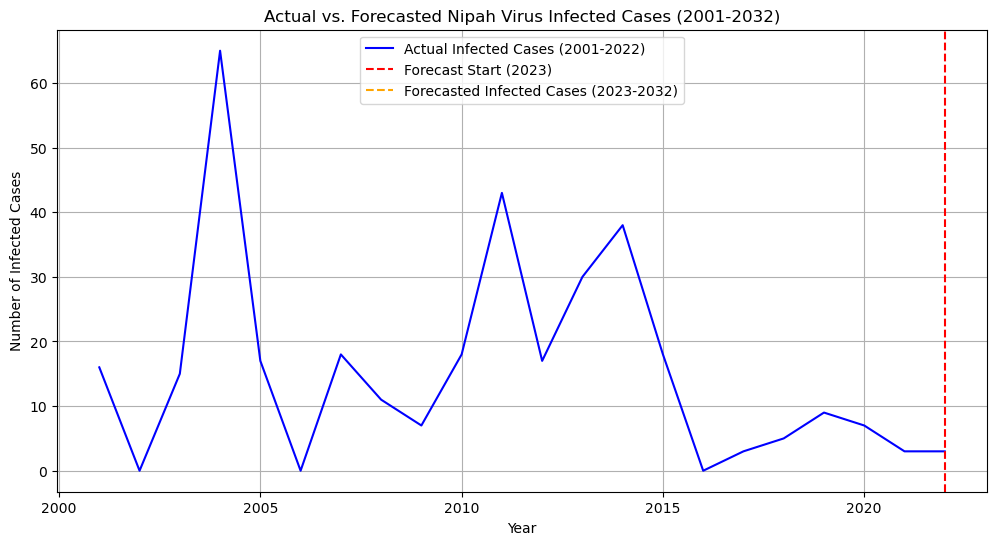

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
data = pd.read_excel("Nipah-Virus-2000-to-2022.xlsx", sheet_name='Data')
data = data.drop(0).reset_index(drop=True)
data.columns = ['Year', 'Max_Temperature', 'Min_Temperature', 'Rainfall', 'Humidity', 'Dry_Bulb_Temperature', 'Infected', 'Deaths']

# Remove non-numeric rows if present and convert necessary columns to numeric
data = data[pd.to_numeric(data['Year'], errors='coerce').notnull()]
data = data.astype({
    'Year': int,
    'Infected': int
})

# Fit the ARIMA model with specified parameters (2, 2, 1)
specified_arima_model = ARIMA(data['Infected'], order=(2, 2, 1)).fit()

# Forecast from 2023 to 2032
last_observed_year = data['Year'].iloc[-1]
forecast_years = 2032 - last_observed_year
specified_forecast_extended = specified_arima_model.predict(start=len(data), end=len(data) + forecast_years - 1)

# Create a new DataFrame for the forecasted data from 2023 to 2032
forecast_extended_index = pd.date_range(start=str(last_observed_year + 1), periods=forecast_years, freq='Y')
forecast_extended_df = pd.DataFrame(specified_forecast_extended, index=forecast_extended_index, columns=['Forecasted_Infected'])

# Convert forecast index to year format
forecast_extended_df.index = forecast_extended_df.index.year

# Combine historical and forecasted data
historical_and_forecast_extended = pd.concat([data.set_index('Year')[['Infected']], forecast_extended_df], axis=0)

# Convert the index to numeric type
historical_and_forecast_extended.index = historical_and_forecast_extended.index.astype(int)

# Plotting the actual vs predicted data from 2001 to 2032
plt.figure(figsize=(12, 6))
plt.plot(historical_and_forecast_extended.index, historical_and_forecast_extended['Infected'], label='Actual Infected Cases (2001-2022)', color='blue')
plt.axvline(x=last_observed_year, color='red', linestyle='--', label='Forecast Start (2023)')
plt.plot(historical_and_forecast_extended.index, historical_and_forecast_extended['Forecasted_Infected'], label='Forecasted Infected Cases (2023-2032)', linestyle='--', color='orange')
plt.title('Actual vs. Forecasted Nipah Virus Infected Cases (2001-2032)')
plt.xlabel('Year')
plt.ylabel('Number of Infected Cases')
plt.legend()
plt.grid(True)
plt.show()


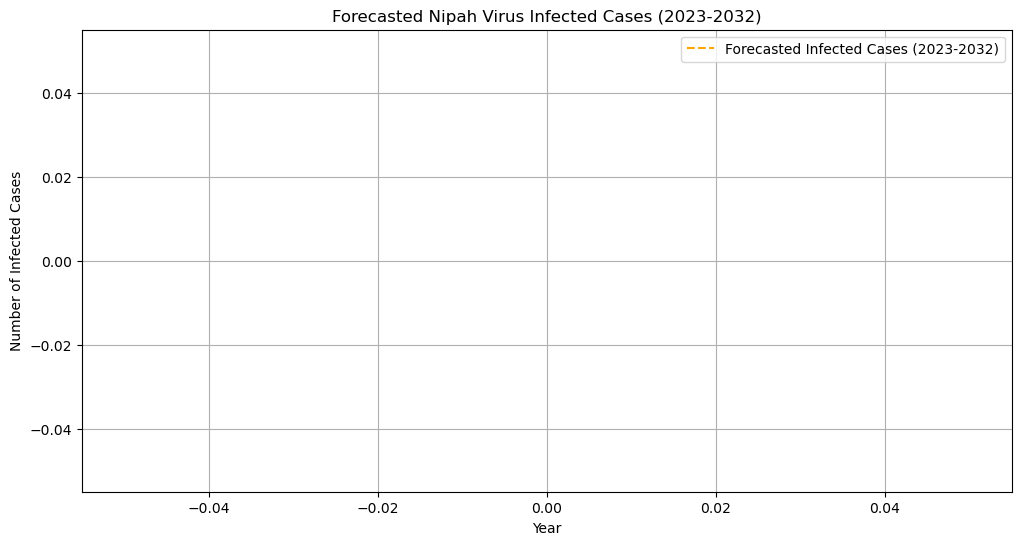

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
data = pd.read_excel("Nipah-Virus-2000-to-2022.xlsx", sheet_name='Data')
data = data.drop(0).reset_index(drop=True)
data.columns = ['Year', 'Max_Temperature', 'Min_Temperature', 'Rainfall', 'Humidity', 'Dry_Bulb_Temperature', 'Infected', 'Deaths']
data = data[pd.to_numeric(data['Year'], errors='coerce').notnull()]
data = data.astype({'Year': int, 'Infected': int})

# Fit the ARIMA model with specified parameters (2, 2, 1)
specified_arima_model = ARIMA(data['Infected'], order=(2, 2, 1)).fit()

# Forecast from 2023 to 2032
last_observed_year = data['Year'].iloc[-1]
forecast_years = 2032 - last_observed_year
specified_forecast_extended = specified_arima_model.predict(start=len(data), end=len(data) + forecast_years - 1)

# Create a new DataFrame for the forecasted data from 2023 to 2032
forecast_extended_index = pd.date_range(start=str(last_observed_year + 1), periods=forecast_years, freq='Y')
forecast_extended_df = pd.DataFrame(specified_forecast_extended, index=forecast_extended_index, columns=['Forecasted_Infected'])

# Convert forecast index to year format
forecast_extended_df.index = forecast_extended_df.index.year

# Plotting the forecasted data separately
plt.figure(figsize=(12, 6))
plt.plot(forecast_extended_df.index, forecast_extended_df['Forecasted_Infected'], label='Forecasted Infected Cases (2023-2032)', linestyle='--', color='orange')
plt.title('Forecasted Nipah Virus Infected Cases (2023-2032)')
plt.xlabel('Year')
plt.ylabel('Number of Infected Cases')
plt.legend()
plt.grid(True)
plt.show()


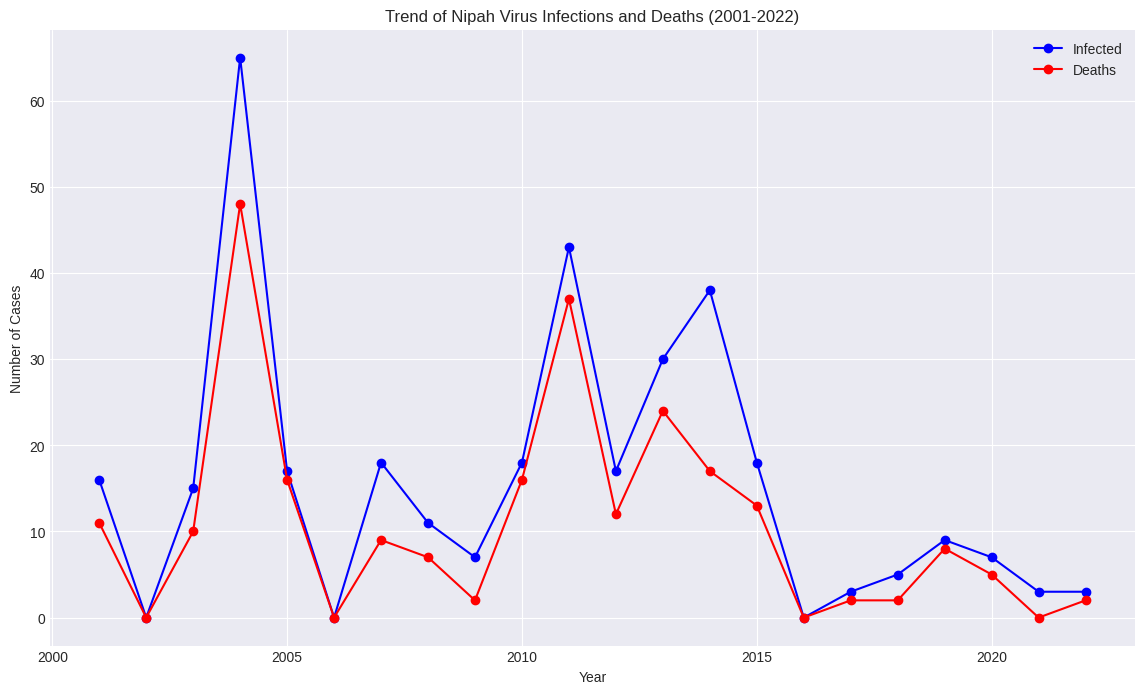

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the main data sheet
nipah_data = data

# Display the first few rows to understand the structure
nipah_data.head()

# Setting up the plot size and style
plt.figure(figsize=(14, 8))
plt.style.use('seaborn-darkgrid')

# Plotting the trend of infections and deaths over time
plt.plot(nipah_data['Year'], nipah_data['Infected'], marker='o', label='Infected', color='blue')
plt.plot(nipah_data['Year'], nipah_data['Deaths'], marker='o', label='Deaths', color='red')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.title('Trend of Nipah Virus Infections and Deaths (2001-2022)')
plt.legend()
plt.grid(True)

# Display the trend plot
plt.show()

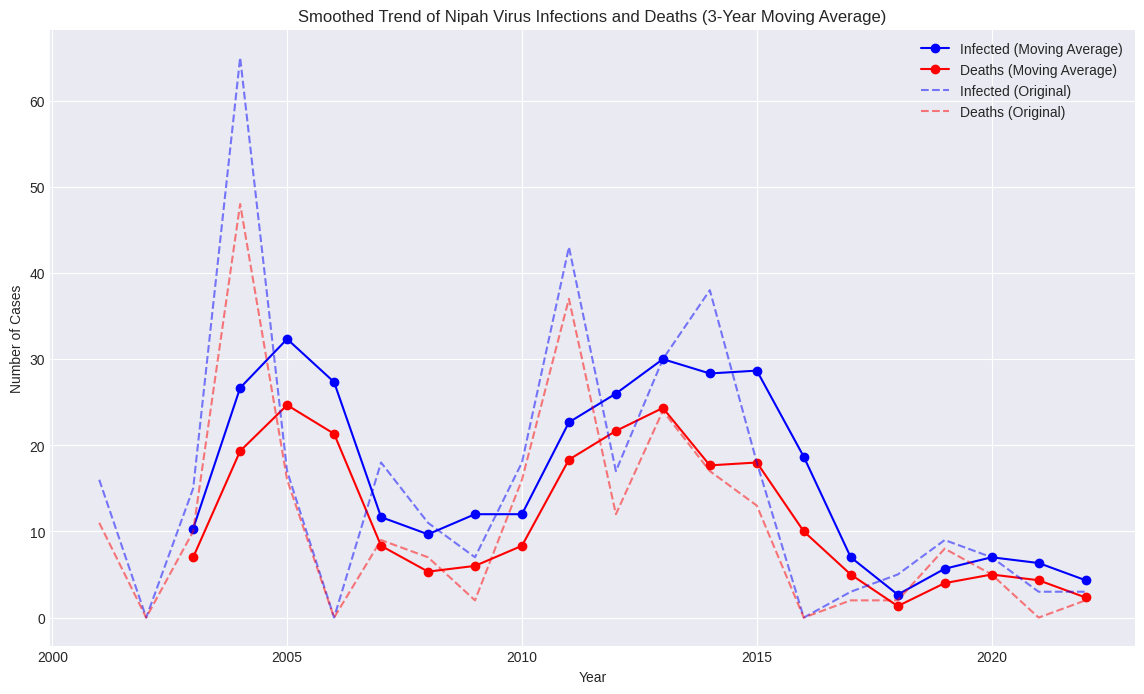

In [18]:
# Applying Moving Average Smoothing
nipah_data['Infected_MA'] = nipah_data['Infected'].rolling(window=3).mean()
nipah_data['Deaths_MA'] = nipah_data['Deaths'].rolling(window=3).mean()

# Plotting the smoothed trends
plt.figure(figsize=(14, 8))
plt.plot(nipah_data['Year'], nipah_data['Infected_MA'], label='Infected (Moving Average)', marker='o', color='blue')
plt.plot(nipah_data['Year'], nipah_data['Deaths_MA'], label='Deaths (Moving Average)', marker='o', color='red')
plt.plot(nipah_data['Year'], nipah_data['Infected'], linestyle='--', color='blue', alpha=0.5, label='Infected (Original)')
plt.plot(nipah_data['Year'], nipah_data['Deaths'], linestyle='--', color='red', alpha=0.5, label='Deaths (Original)')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.title('Smoothed Trend of Nipah Virus Infections and Deaths (3-Year Moving Average)')
plt.legend()
plt.grid(True)

# Display the smoothed trend plot
plt.show()


In [21]:
import pandas as pd
import warnings
from itertools import product
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Suppress warnings for clarity during grid search
warnings.filterwarnings('ignore')

# Clean the dataset
# Convert columns to numeric, forcing errors to NaN
data[['Max_Temperature', 'Min_Temperature', 'Rainfall', 'Humidity', 'Dry_Bulb_Temperature', 'Deaths']] = data[['Max_Temperature', 'Min_Temperature', 'Rainfall', 'Humidity', 'Dry_Bulb_Temperature', 'Deaths']].apply(pd.to_numeric, errors='coerce')

# Drop rows with any NaN values
data.dropna(inplace=True)

# Save the cleaned dataset to a new CSV file
data.to_csv('Cleaned_Nipah_Virus_Data.csv', index=False)

# Load the cleaned dataset
data = pd.read_csv('Cleaned_Nipah_Virus_Data.csv', index_col='Year', parse_dates=True)

# Define the parameter grid
p = range(0, 3)  # AR terms
d = range(0, 2)  # Differencing
q = range(0, 3)  # MA terms
P = range(0, 3)  # Seasonal AR terms
D = range(0, 2)  # Seasonal differencing
Q = range(0, 3)  # Seasonal MA terms
s = [1, 12]      # Seasonality (1 for no seasonality, 12 for yearly seasonality)

# Generate all combinations of p, d, q, P, D, Q, s
parameter_combinations = list(product(p, d, q, P, D, Q, s))

# Split data into train and test sets
train = data[data.index <= '2018']
test = data[data.index > '2018']

# Function to evaluate SARIMA model
def evaluate_sarima(parameters):
    order = (parameters[0], parameters[1], parameters[2])
    seasonal_order = (parameters[3], parameters[4], parameters[5], parameters[6])
    try:
        model = SARIMAX(train['Infected'], order=order, seasonal_order=seasonal_order).fit(disp=False)
        return model.aic
    except:
        return float('inf')

# Grid search over all parameter combinations
best_aic = float('inf')
best_params = None

for params in parameter_combinations:
    aic = evaluate_sarima(params)
    if aic < best_aic:
        best_aic = aic
        best_params = params

# Display the best parameters and AIC value
print(f"Best SARIMA Parameters: {best_params}")
print(f"Best AIC: {best_aic}")

Best SARIMA Parameters: (2, 0, 0, 0, 1, 0, 12)
Best AIC: 6.0


In [16]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet # Install using: pip install prophet
from sklearn.metrics import mean_absolute_error

# Step 1: Load the original dataset
original_data = pd.read_excel("Nipah-Virus-2000-to-2022.xlsx", sheet_name='Data')

# Step 2: Clean the dataset
# Rename columns for clarity
original_data.columns = ['Year', 'Max_Temperature', 'Min_Temperature', 'Rainfall', 'Humidity', 'Dry_Bulb_Temperature', 'Infected', 'Deaths']

# Remove rows with non-numeric 'Year' or missing 'Infected' values
original_data = original_data[pd.to_numeric(original_data['Year'], errors='coerce').notnull()]
original_data = original_data[pd.to_numeric(original_data['Infected'], errors='coerce').notnull()]

# Convert necessary columns to numeric types
original_data = original_data.astype({
    'Year': int,
    'Max_Temperature': float,
    'Min_Temperature': float,
    'Rainfall': float,
    'Humidity': float,
    'Dry_Bulb_Temperature': float,
    'Infected': int,
    'Deaths': int
})

# Check for missing values and handle if necessary (use forward fill)
original_data.fillna(method='ffill', inplace=True)

# Step 3: Set the cleaned data to a new variable
cleaned_data = original_data.set_index('Year')

# Step 4: Continue with the analysis using the cleaned data
# Split data into train and test sets
train = cleaned_data[cleaned_data.index <= 2018]
test = cleaned_data[cleaned_data.index > 2018]

# Fit ARIMA model on cleaned data
arima_model = ARIMA(train['Infected'], order=(2, 2, 1)).fit()
arima_forecast = arima_model.forecast(steps=len(test))
arima_mae = mean_absolute_error(test['Infected'], arima_forecast)

# Fit SARIMA model on cleaned data
sarima_model = SARIMAX(train['Infected'], order=(2, 0, 0), seasonal_order=(0, 1, 0, 12)).fit()
sarima_forecast = sarima_model.forecast(steps=len(test))
sarima_mae = mean_absolute_error(test['Infected'], sarima_forecast)

# Prepare data for Prophet model
prophet_df = train.reset_index().rename(columns={'Year': 'ds', 'Infected': 'y'})
prophet_model = Prophet(yearly_seasonality=True).fit(prophet_df)
future = prophet_model.make_future_dataframe(periods=len(test), freq='Y')
prophet_forecast = prophet_model.predict(future)
prophet_forecast_test = prophet_forecast.iloc[-len(test):]['yhat']
prophet_mae = mean_absolute_error(test['Infected'], prophet_forecast_test)

# Evaluate models
print(f'ARIMA MAE: {arima_mae}')
print(f'SARIMA MAE: {sarima_mae}')
print(f'Prophet MAE: {prophet_mae}')

error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try apt install
    python3-xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a non-Debian-packaged Python package,
    create a virtual environment using python3 -m venv path/to/venv.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip. Make
    sure you have python3-full installed.
    
    If you wish to install a non-Debian packaged Python application,
    it may be easiest to use pipx install xyz, which will manage a
    virtual environment for you. Make sure you have pipx installed.
    
    See /usr/share/doc/python3.12/README.venv for more information.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation or OS, by passing --break-system-packages.
hint: See PEP 668 for the detai

ModuleNotFoundError: No module named 'prophet'